In [10]:
import pandas as pd
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)


quantificators = ["CC", "ACC", "PCC","PCCW", "PACC", "HDy","DyS","SMM", "EMQ", "MLPE"]
#quantificators = ["CC", "ACC", "PCC", "PACC", "HDy", "EMQ", "MLPE"]
error = "MAE"
mixture_points = np.linspace(0, 1, 3)[::-1]
p_train = 0.7
ps_test = [p_train, 0.5, 0.25]
dateexperiment = "2022_07_12_06_16"

results_dict={}
print("Loading results... ",sep="")
for quant_name in quantificators:
    results_dict[quant_name] = pd.read_csv("results/covariate/results_%s_%s.csv" % (dateexperiment,quant_name),index_col=0)
    results_dict[quant_name]['covariate_measure'] = abs(results_dict[quant_name]['domainA_prop_train']-results_dict[quant_name]['domainA_prop_test'])
    results_dict[quant_name]['covariate_measure'] = results_dict[quant_name]['covariate_measure'].round(1)
print("Done")


mean_error_methods = {}

writer = pd.ExcelWriter('results/covariate/excel/errors_%s.xlsx' % dateexperiment, engine='xlsxwriter')
for i, p_test in enumerate(ps_test):
    for quant_name in quantificators:
        exp_id = "%s_%f" % (quant_name,p_test)
        results = results_dict[quant_name]
        results = results.loc[results['p_test'] == p_test]
        results_mean = results.groupby(['domainA_prop_train', 'domainA_prop_test'])['error'].mean().reset_index()
        #convert to matrix form
        results_mean = results_mean.pivot(index='domainA_prop_train', columns='domainA_prop_test', values='error')
        results_mean.columns = results_mean.columns.map(lambda x: "%.1f" % float(x))
        results_mean.columns.name="domA prop test"
        results_mean.index.name="domA prop train"
        mean_error_methods[exp_id]=results_mean.mean().mean()
        print("Results for method %s. p_test: %f. Mean %s: %f" % (quant_name,p_test,error,mean_error_methods[exp_id]))
        cm = sns.light_palette('red', as_cmap=True)
        display(results_mean.style.format_index('{:.1f}').format('{:.3f}').background_gradient(cmap=cm,low=0,high=1))
        results_mean.to_excel(writer, sheet_name=exp_id)
        workbook = writer.book
        worksheet = writer.sheets[exp_id]
        # Apply a conditional format to the cell range.
        worksheet.conditional_format('B2:L12', {'type': '2_color_scale','min_type':'num','max_type':'num','min_value':'0','max_value':'1','min_color':'#f3f0f0','max_color':'#ff0000'})
writer.save()


Loading results... 
Done
Results for method CC. p_test: 0.700000. Mean MAE: 0.027177


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.020,0.026,0.036,0.044,0.057,0.066,0.069,0.080,0.095,0.102,0.112
0.1,0.017,0.019,0.022,0.023,0.026,0.028,0.027,0.030,0.036,0.037,0.039
0.2,0.021,0.022,0.024,0.025,0.027,0.029,0.027,0.029,0.034,0.034,0.036
0.3,0.016,0.017,0.017,0.019,0.018,0.019,0.017,0.019,0.020,0.022,0.022
0.4,0.017,0.018,0.019,0.019,0.020,0.020,0.020,0.021,0.023,0.026,0.026
0.5,0.022,0.024,0.024,0.026,0.025,0.025,0.023,0.026,0.027,0.030,0.030
0.6,0.018,0.018,0.019,0.020,0.018,0.019,0.016,0.020,0.018,0.021,0.020
0.7,0.017,0.017,0.016,0.018,0.017,0.017,0.016,0.019,0.017,0.020,0.019
0.8,0.021,0.022,0.022,0.023,0.021,0.021,0.019,0.021,0.020,0.023,0.021


Results for method ACC. p_test: 0.700000. Mean MAE: 0.030268


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.021,0.027,0.041,0.053,0.070,0.084,0.087,0.103,0.125,0.134,0.148
0.1,0.019,0.020,0.024,0.024,0.026,0.028,0.026,0.031,0.037,0.039,0.041
0.2,0.020,0.021,0.023,0.024,0.026,0.026,0.024,0.028,0.034,0.033,0.035
0.3,0.021,0.020,0.021,0.023,0.022,0.023,0.022,0.024,0.026,0.028,0.030
0.4,0.021,0.020,0.020,0.020,0.020,0.020,0.020,0.021,0.023,0.025,0.025
0.5,0.021,0.022,0.023,0.022,0.022,0.021,0.019,0.024,0.024,0.026,0.026
0.6,0.021,0.020,0.020,0.020,0.019,0.018,0.018,0.021,0.018,0.020,0.018
0.7,0.021,0.020,0.018,0.018,0.019,0.018,0.018,0.021,0.019,0.021,0.021
0.8,0.023,0.022,0.020,0.018,0.019,0.019,0.018,0.020,0.018,0.020,0.019


Results for method PCC. p_test: 0.700000. Mean MAE: 0.017143


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.016,0.020,0.026,0.031,0.039,0.046,0.047,0.056,0.065,0.071,0.077
0.1,0.012,0.013,0.015,0.015,0.016,0.017,0.016,0.018,0.022,0.021,0.022
0.2,0.011,0.011,0.012,0.012,0.012,0.011,0.010,0.012,0.014,0.013,0.012
0.3,0.012,0.012,0.012,0.011,0.012,0.011,0.011,0.012,0.012,0.012,0.011
0.4,0.011,0.011,0.012,0.011,0.012,0.011,0.011,0.011,0.013,0.014,0.013
0.5,0.010,0.011,0.011,0.010,0.011,0.010,0.010,0.011,0.011,0.011,0.010
0.6,0.011,0.011,0.011,0.011,0.010,0.010,0.009,0.011,0.011,0.011,0.010
0.7,0.017,0.016,0.017,0.016,0.016,0.015,0.015,0.016,0.016,0.016,0.016
0.8,0.012,0.011,0.011,0.011,0.011,0.010,0.009,0.011,0.010,0.011,0.011


Results for method PCCW. p_test: 0.700000. Mean MAE: 0.026957


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.015,0.019,0.031,0.044,0.062,0.081,0.090,0.115,0.143,0.164,0.189
0.1,0.016,0.015,0.016,0.017,0.020,0.020,0.021,0.027,0.037,0.039,0.043
0.2,0.016,0.015,0.015,0.016,0.017,0.014,0.016,0.018,0.023,0.022,0.023
0.3,0.017,0.016,0.016,0.016,0.016,0.013,0.016,0.016,0.017,0.016,0.014
0.4,0.019,0.017,0.015,0.015,0.015,0.011,0.015,0.015,0.017,0.017,0.016
0.5,0.018,0.017,0.016,0.015,0.016,0.011,0.014,0.014,0.014,0.014,0.012
0.6,0.023,0.019,0.018,0.017,0.018,0.014,0.017,0.015,0.014,0.013,0.012
0.7,0.023,0.020,0.018,0.017,0.018,0.014,0.018,0.016,0.015,0.014,0.014
0.8,0.027,0.022,0.020,0.018,0.019,0.014,0.018,0.015,0.014,0.013,0.012


Results for method PACC. p_test: 0.700000. Mean MAE: 0.024931


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.016,0.023,0.034,0.044,0.057,0.070,0.073,0.089,0.106,0.116,0.128
0.1,0.017,0.018,0.020,0.020,0.021,0.021,0.020,0.024,0.030,0.030,0.031
0.2,0.018,0.017,0.017,0.018,0.018,0.015,0.016,0.019,0.022,0.019,0.019
0.3,0.018,0.018,0.017,0.017,0.017,0.014,0.017,0.017,0.018,0.017,0.015
0.4,0.018,0.018,0.017,0.017,0.018,0.015,0.017,0.018,0.020,0.020,0.019
0.5,0.018,0.018,0.018,0.017,0.018,0.015,0.016,0.018,0.018,0.018,0.017
0.6,0.018,0.017,0.016,0.017,0.017,0.014,0.017,0.017,0.017,0.016,0.016
0.7,0.018,0.017,0.016,0.016,0.016,0.013,0.015,0.016,0.017,0.015,0.016
0.8,0.019,0.018,0.017,0.016,0.017,0.014,0.016,0.016,0.016,0.016,0.015


Results for method HDy. p_test: 0.700000. Mean MAE: 0.050385


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.022,0.032,0.053,0.075,0.104,0.128,0.149,0.180,0.222,0.254,0.294
0.1,0.021,0.021,0.030,0.042,0.059,0.072,0.085,0.106,0.135,0.151,0.172
0.2,0.025,0.020,0.022,0.026,0.033,0.039,0.045,0.059,0.078,0.086,0.097
0.3,0.026,0.023,0.022,0.023,0.023,0.022,0.026,0.031,0.037,0.041,0.042
0.4,0.039,0.030,0.026,0.022,0.020,0.019,0.023,0.030,0.037,0.044,0.049
0.5,0.037,0.031,0.028,0.023,0.022,0.020,0.021,0.025,0.027,0.033,0.035
0.6,0.049,0.043,0.037,0.033,0.029,0.025,0.025,0.025,0.021,0.022,0.022
0.7,0.063,0.051,0.044,0.033,0.031,0.025,0.025,0.023,0.022,0.025,0.028
0.8,0.084,0.070,0.062,0.052,0.043,0.036,0.031,0.027,0.023,0.025,0.027


Results for method DyS. p_test: 0.700000. Mean MAE: 0.029549


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.017,0.023,0.036,0.048,0.065,0.081,0.091,0.111,0.137,0.153,0.175
0.1,0.017,0.017,0.019,0.018,0.021,0.020,0.022,0.025,0.030,0.031,0.033
0.2,0.018,0.018,0.018,0.019,0.018,0.016,0.019,0.021,0.024,0.023,0.023
0.3,0.021,0.019,0.019,0.020,0.021,0.019,0.021,0.023,0.025,0.026,0.026
0.4,0.020,0.019,0.020,0.018,0.019,0.016,0.018,0.019,0.020,0.021,0.020
0.5,0.024,0.021,0.019,0.017,0.018,0.014,0.016,0.017,0.018,0.019,0.019
0.6,0.022,0.020,0.019,0.019,0.018,0.016,0.020,0.018,0.017,0.016,0.017
0.7,0.032,0.026,0.023,0.021,0.021,0.016,0.018,0.018,0.017,0.016,0.016
0.8,0.035,0.029,0.025,0.022,0.021,0.017,0.019,0.017,0.016,0.015,0.014


Results for method SMM. p_test: 0.700000. Mean MAE: 0.027290


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.016,0.022,0.031,0.040,0.052,0.064,0.067,0.081,0.097,0.106,0.117
0.1,0.018,0.018,0.020,0.021,0.023,0.024,0.024,0.031,0.039,0.039,0.042
0.2,0.021,0.020,0.021,0.021,0.024,0.023,0.024,0.028,0.033,0.035,0.035
0.3,0.019,0.019,0.018,0.018,0.018,0.014,0.017,0.018,0.020,0.020,0.019
0.4,0.019,0.019,0.018,0.019,0.019,0.016,0.019,0.020,0.023,0.022,0.022
0.5,0.019,0.018,0.018,0.018,0.018,0.015,0.016,0.018,0.019,0.019,0.017
0.6,0.021,0.021,0.020,0.019,0.019,0.017,0.018,0.019,0.019,0.018,0.017
0.7,0.022,0.019,0.018,0.018,0.018,0.014,0.017,0.016,0.016,0.015,0.015
0.8,0.023,0.021,0.020,0.019,0.019,0.016,0.017,0.016,0.017,0.017,0.016


Results for method EMQ. p_test: 0.700000. Mean MAE: 0.029644


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.016,0.024,0.038,0.052,0.072,0.091,0.100,0.126,0.157,0.177,0.204
0.1,0.016,0.016,0.020,0.021,0.024,0.026,0.026,0.033,0.044,0.046,0.051
0.2,0.016,0.016,0.017,0.017,0.018,0.015,0.016,0.019,0.023,0.021,0.021
0.3,0.017,0.017,0.017,0.017,0.017,0.014,0.016,0.017,0.018,0.018,0.015
0.4,0.018,0.017,0.016,0.016,0.016,0.013,0.016,0.016,0.019,0.019,0.019
0.5,0.018,0.017,0.017,0.016,0.016,0.013,0.014,0.016,0.017,0.017,0.015
0.6,0.022,0.019,0.018,0.017,0.017,0.014,0.016,0.015,0.015,0.014,0.013
0.7,0.024,0.021,0.018,0.017,0.018,0.014,0.016,0.016,0.016,0.015,0.014
0.8,0.028,0.024,0.021,0.019,0.019,0.015,0.017,0.016,0.015,0.015,0.013


Results for method MLPE. p_test: 0.700000. Mean MAE: 0.000188


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.001,0.000,0.000,0.000
0.1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000
0.2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000
0.3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000
0.4,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.001,0.000,0.000,0.000
0.5,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.001,0.000,0.000,0.000
0.6,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.001,0.000,0.000,0.000
0.7,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.001,0.000,0.000,0.000
0.8,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000


Results for method CC. p_test: 0.500000. Mean MAE: 0.054928


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.044,0.040,0.037,0.036,0.037,0.039,0.043,0.044,0.049,0.051,0.056
0.1,0.046,0.044,0.046,0.045,0.044,0.043,0.047,0.045,0.043,0.043,0.041
0.2,0.045,0.044,0.046,0.044,0.044,0.043,0.048,0.047,0.046,0.045,0.045
0.3,0.049,0.048,0.049,0.048,0.049,0.048,0.053,0.051,0.050,0.047,0.046
0.4,0.050,0.048,0.049,0.046,0.045,0.045,0.048,0.045,0.043,0.039,0.039
0.5,0.046,0.044,0.045,0.041,0.041,0.040,0.042,0.039,0.039,0.034,0.031
0.6,0.057,0.054,0.055,0.051,0.050,0.049,0.052,0.048,0.048,0.042,0.041
0.7,0.068,0.065,0.065,0.059,0.058,0.056,0.056,0.052,0.050,0.043,0.041
0.8,0.067,0.062,0.063,0.057,0.055,0.052,0.055,0.049,0.047,0.040,0.038


Results for method ACC. p_test: 0.500000. Mean MAE: 0.033462


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.023,0.027,0.032,0.041,0.051,0.059,0.062,0.075,0.084,0.091,0.100
0.1,0.025,0.025,0.023,0.022,0.026,0.025,0.022,0.025,0.028,0.028,0.028
0.2,0.025,0.026,0.023,0.025,0.027,0.026,0.024,0.027,0.028,0.029,0.028
0.3,0.025,0.025,0.023,0.024,0.026,0.026,0.023,0.026,0.026,0.028,0.030
0.4,0.023,0.023,0.019,0.020,0.023,0.022,0.020,0.023,0.023,0.027,0.027
0.5,0.023,0.025,0.022,0.023,0.025,0.025,0.022,0.027,0.026,0.031,0.032
0.6,0.025,0.022,0.021,0.021,0.022,0.021,0.020,0.023,0.020,0.023,0.021
0.7,0.028,0.024,0.022,0.020,0.022,0.021,0.019,0.023,0.021,0.027,0.028
0.8,0.035,0.028,0.028,0.022,0.024,0.022,0.020,0.022,0.019,0.025,0.024


Results for method PCC. p_test: 0.500000. Mean MAE: 0.082873


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.069,0.068,0.066,0.062,0.059,0.056,0.057,0.053,0.052,0.050,0.050
0.1,0.074,0.074,0.076,0.075,0.076,0.076,0.080,0.079,0.078,0.079,0.080
0.2,0.069,0.069,0.072,0.071,0.072,0.072,0.077,0.075,0.076,0.075,0.078
0.3,0.076,0.076,0.077,0.077,0.078,0.078,0.082,0.082,0.081,0.080,0.081
0.4,0.074,0.073,0.073,0.071,0.071,0.070,0.073,0.071,0.070,0.066,0.067
0.5,0.095,0.093,0.093,0.090,0.090,0.088,0.090,0.087,0.086,0.082,0.082
0.6,0.089,0.087,0.087,0.083,0.082,0.081,0.082,0.079,0.077,0.074,0.074
0.7,0.096,0.092,0.091,0.087,0.086,0.083,0.084,0.080,0.077,0.072,0.071
0.8,0.100,0.096,0.095,0.089,0.088,0.084,0.085,0.080,0.077,0.071,0.069


Results for method PCCW. p_test: 0.500000. Mean MAE: 0.031525


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.019,0.015,0.018,0.029,0.041,0.055,0.066,0.089,0.108,0.128,0.151
0.1,0.023,0.019,0.018,0.017,0.018,0.017,0.018,0.020,0.024,0.027,0.029
0.2,0.022,0.019,0.019,0.019,0.019,0.017,0.019,0.018,0.018,0.019,0.017
0.3,0.024,0.022,0.022,0.022,0.022,0.022,0.023,0.023,0.020,0.020,0.018
0.4,0.027,0.025,0.024,0.022,0.021,0.020,0.021,0.020,0.018,0.017,0.017
0.5,0.024,0.022,0.021,0.020,0.020,0.019,0.020,0.019,0.017,0.016,0.014
0.6,0.030,0.026,0.027,0.024,0.025,0.024,0.026,0.024,0.021,0.020,0.019
0.7,0.033,0.029,0.029,0.026,0.026,0.025,0.028,0.025,0.023,0.021,0.021
0.8,0.034,0.029,0.030,0.026,0.026,0.024,0.026,0.023,0.019,0.018,0.017


Results for method PACC. p_test: 0.500000. Mean MAE: 0.029745


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.021,0.024,0.026,0.033,0.039,0.045,0.047,0.056,0.062,0.068,0.074
0.1,0.023,0.023,0.020,0.020,0.022,0.020,0.019,0.020,0.022,0.023,0.021
0.2,0.022,0.022,0.018,0.020,0.022,0.019,0.018,0.019,0.019,0.019,0.017
0.3,0.022,0.022,0.019,0.021,0.022,0.020,0.018,0.020,0.018,0.020,0.017
0.4,0.020,0.021,0.019,0.021,0.024,0.022,0.021,0.023,0.024,0.028,0.027
0.5,0.019,0.020,0.017,0.019,0.022,0.020,0.019,0.024,0.024,0.029,0.028
0.6,0.020,0.018,0.017,0.018,0.020,0.019,0.018,0.022,0.022,0.025,0.024
0.7,0.027,0.022,0.019,0.018,0.019,0.016,0.015,0.019,0.020,0.023,0.025
0.8,0.039,0.031,0.028,0.022,0.022,0.019,0.017,0.020,0.019,0.025,0.027


Results for method HDy. p_test: 0.500000. Mean MAE: 0.049082


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.023,0.031,0.046,0.065,0.087,0.105,0.123,0.151,0.178,0.205,0.238
0.1,0.022,0.023,0.029,0.041,0.056,0.066,0.077,0.099,0.118,0.133,0.154
0.2,0.024,0.019,0.018,0.026,0.033,0.039,0.045,0.060,0.072,0.082,0.094
0.3,0.027,0.023,0.021,0.023,0.025,0.026,0.026,0.035,0.038,0.041,0.045
0.4,0.039,0.030,0.026,0.023,0.021,0.022,0.023,0.032,0.038,0.045,0.051
0.5,0.038,0.030,0.028,0.025,0.023,0.024,0.021,0.028,0.029,0.034,0.039
0.6,0.049,0.042,0.036,0.031,0.029,0.027,0.025,0.026,0.022,0.022,0.021
0.7,0.067,0.052,0.044,0.038,0.032,0.028,0.026,0.025,0.023,0.027,0.030
0.8,0.083,0.067,0.060,0.050,0.042,0.036,0.031,0.027,0.024,0.024,0.026


Results for method DyS. p_test: 0.500000. Mean MAE: 0.032630


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.018,0.021,0.029,0.041,0.054,0.065,0.076,0.092,0.108,0.121,0.139
0.1,0.019,0.017,0.017,0.018,0.021,0.022,0.025,0.027,0.029,0.033,0.035
0.2,0.020,0.019,0.016,0.019,0.020,0.018,0.021,0.021,0.022,0.024,0.023
0.3,0.022,0.020,0.019,0.021,0.023,0.022,0.023,0.025,0.026,0.028,0.027
0.4,0.022,0.020,0.019,0.021,0.021,0.019,0.020,0.020,0.019,0.021,0.019
0.5,0.025,0.021,0.018,0.017,0.019,0.017,0.017,0.019,0.017,0.019,0.018
0.6,0.026,0.023,0.021,0.021,0.021,0.020,0.021,0.020,0.019,0.018,0.017
0.7,0.037,0.030,0.027,0.024,0.024,0.021,0.020,0.020,0.018,0.017,0.015
0.8,0.045,0.036,0.034,0.028,0.026,0.022,0.022,0.021,0.016,0.016,0.014


Results for method SMM. p_test: 0.500000. Mean MAE: 0.031689


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.018,0.020,0.020,0.027,0.033,0.038,0.041,0.049,0.055,0.061,0.067
0.1,0.020,0.020,0.019,0.020,0.023,0.022,0.022,0.025,0.026,0.028,0.028
0.2,0.025,0.023,0.021,0.022,0.025,0.024,0.024,0.026,0.027,0.030,0.030
0.3,0.021,0.020,0.018,0.019,0.021,0.018,0.018,0.020,0.020,0.021,0.019
0.4,0.021,0.020,0.018,0.020,0.022,0.020,0.020,0.023,0.025,0.027,0.027
0.5,0.022,0.021,0.018,0.019,0.021,0.018,0.017,0.021,0.021,0.025,0.025
0.6,0.029,0.025,0.023,0.022,0.023,0.022,0.021,0.023,0.022,0.025,0.024
0.7,0.038,0.030,0.027,0.023,0.023,0.018,0.017,0.019,0.018,0.021,0.023
0.8,0.049,0.039,0.035,0.028,0.025,0.020,0.018,0.018,0.017,0.024,0.026


Results for method EMQ. p_test: 0.500000. Mean MAE: 0.030839


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.019,0.025,0.036,0.052,0.067,0.083,0.094,0.117,0.137,0.156,0.179
0.1,0.018,0.018,0.018,0.022,0.026,0.028,0.028,0.036,0.043,0.046,0.052
0.2,0.018,0.017,0.015,0.019,0.020,0.019,0.019,0.021,0.022,0.023,0.022
0.3,0.019,0.017,0.017,0.019,0.020,0.018,0.017,0.019,0.018,0.019,0.016
0.4,0.018,0.017,0.016,0.018,0.018,0.017,0.017,0.019,0.018,0.021,0.020
0.5,0.019,0.018,0.015,0.018,0.018,0.016,0.016,0.018,0.016,0.018,0.016
0.6,0.021,0.018,0.017,0.018,0.018,0.016,0.016,0.018,0.015,0.015,0.013
0.7,0.020,0.018,0.016,0.017,0.018,0.016,0.016,0.018,0.016,0.016,0.015
0.8,0.025,0.022,0.020,0.019,0.019,0.018,0.016,0.019,0.015,0.017,0.015


Results for method MLPE. p_test: 0.500000. Mean MAE: 0.199896


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.200,0.200,0.200,0.200,0.200,0.200,0.200,0.200,0.200,0.200,0.200
0.1,0.200,0.200,0.200,0.200,0.200,0.200,0.200,0.200,0.200,0.200,0.200
0.2,0.200,0.200,0.200,0.200,0.200,0.200,0.200,0.200,0.200,0.200,0.200
0.3,0.200,0.200,0.200,0.200,0.200,0.200,0.200,0.200,0.200,0.200,0.200
0.4,0.200,0.200,0.200,0.200,0.200,0.200,0.200,0.200,0.200,0.200,0.200
0.5,0.200,0.200,0.200,0.200,0.200,0.200,0.200,0.200,0.200,0.200,0.200
0.6,0.200,0.200,0.200,0.200,0.200,0.200,0.200,0.200,0.200,0.200,0.200
0.7,0.200,0.200,0.200,0.200,0.200,0.200,0.200,0.200,0.200,0.200,0.200
0.8,0.200,0.200,0.200,0.200,0.200,0.200,0.200,0.200,0.200,0.200,0.200


Results for method CC. p_test: 0.250000. Mean MAE: 0.137326


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.118,0.119,0.116,0.116,0.115,0.116,0.117,0.112,0.111,0.108,0.112
0.1,0.119,0.122,0.120,0.124,0.126,0.131,0.133,0.130,0.131,0.130,0.136
0.2,0.121,0.122,0.121,0.124,0.125,0.129,0.130,0.128,0.128,0.127,0.132
0.3,0.124,0.126,0.124,0.127,0.128,0.130,0.131,0.127,0.128,0.125,0.129
0.4,0.129,0.127,0.124,0.127,0.124,0.125,0.124,0.120,0.118,0.114,0.116
0.5,0.129,0.127,0.124,0.125,0.120,0.121,0.119,0.115,0.112,0.107,0.108
0.6,0.141,0.137,0.133,0.133,0.130,0.130,0.127,0.121,0.120,0.113,0.114
0.7,0.160,0.153,0.149,0.146,0.142,0.139,0.135,0.127,0.123,0.115,0.114
0.8,0.165,0.159,0.153,0.148,0.142,0.139,0.134,0.125,0.120,0.111,0.109


Results for method ACC. p_test: 0.250000. Mean MAE: 0.040773


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.024,0.024,0.027,0.028,0.035,0.039,0.042,0.049,0.055,0.062,0.067
0.1,0.030,0.026,0.027,0.023,0.024,0.022,0.022,0.023,0.027,0.026,0.025
0.2,0.032,0.027,0.029,0.026,0.028,0.023,0.023,0.027,0.028,0.027,0.025
0.3,0.031,0.027,0.030,0.026,0.028,0.027,0.025,0.028,0.031,0.032,0.029
0.4,0.025,0.024,0.025,0.022,0.024,0.024,0.022,0.026,0.028,0.032,0.029
0.5,0.027,0.027,0.028,0.026,0.029,0.027,0.026,0.033,0.035,0.040,0.038
0.6,0.030,0.026,0.025,0.023,0.024,0.023,0.022,0.025,0.025,0.030,0.028
0.7,0.043,0.034,0.029,0.026,0.025,0.023,0.021,0.026,0.028,0.035,0.036
0.8,0.059,0.050,0.042,0.035,0.031,0.026,0.022,0.024,0.025,0.032,0.034


Results for method PCC. p_test: 0.250000. Mean MAE: 0.195207


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.173,0.177,0.177,0.179,0.182,0.186,0.188,0.186,0.188,0.189,0.194
0.1,0.176,0.181,0.182,0.184,0.189,0.194,0.197,0.196,0.198,0.200,0.206
0.2,0.165,0.168,0.169,0.171,0.174,0.178,0.181,0.179,0.181,0.182,0.188
0.3,0.175,0.178,0.178,0.179,0.181,0.184,0.186,0.183,0.185,0.185,0.189
0.4,0.174,0.173,0.172,0.171,0.171,0.172,0.171,0.167,0.166,0.162,0.166
0.5,0.216,0.214,0.211,0.209,0.207,0.207,0.205,0.200,0.197,0.193,0.194
0.6,0.204,0.201,0.198,0.194,0.192,0.191,0.188,0.181,0.178,0.174,0.174
0.7,0.222,0.216,0.211,0.207,0.203,0.199,0.195,0.187,0.182,0.175,0.174
0.8,0.228,0.221,0.215,0.209,0.203,0.199,0.193,0.183,0.177,0.170,0.166


Results for method PCCW. p_test: 0.250000. Mean MAE: 0.033384


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.022,0.019,0.018,0.020,0.025,0.034,0.042,0.058,0.070,0.089,0.101
0.1,0.025,0.025,0.020,0.019,0.020,0.019,0.019,0.020,0.023,0.025,0.025
0.2,0.024,0.023,0.020,0.020,0.021,0.022,0.022,0.020,0.020,0.020,0.022
0.3,0.025,0.026,0.022,0.023,0.025,0.027,0.027,0.025,0.024,0.021,0.026
0.4,0.030,0.029,0.025,0.026,0.026,0.027,0.026,0.024,0.022,0.019,0.023
0.5,0.025,0.025,0.022,0.023,0.022,0.023,0.023,0.022,0.020,0.017,0.021
0.6,0.028,0.028,0.025,0.026,0.027,0.028,0.029,0.027,0.024,0.021,0.027
0.7,0.031,0.031,0.026,0.028,0.029,0.030,0.030,0.028,0.026,0.023,0.028
0.8,0.032,0.032,0.027,0.028,0.028,0.028,0.027,0.025,0.021,0.018,0.022


Results for method PACC. p_test: 0.250000. Mean MAE: 0.042461


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.027,0.024,0.025,0.023,0.027,0.029,0.032,0.037,0.042,0.045,0.050
0.1,0.035,0.029,0.027,0.024,0.023,0.021,0.022,0.023,0.026,0.027,0.032
0.2,0.035,0.031,0.029,0.026,0.025,0.020,0.018,0.021,0.020,0.020,0.019
0.3,0.033,0.031,0.030,0.028,0.028,0.024,0.021,0.026,0.026,0.025,0.020
0.4,0.025,0.028,0.030,0.030,0.032,0.030,0.030,0.038,0.042,0.047,0.041
0.5,0.020,0.021,0.023,0.025,0.027,0.027,0.028,0.038,0.043,0.049,0.046
0.6,0.024,0.022,0.021,0.021,0.023,0.023,0.025,0.033,0.038,0.045,0.044
0.7,0.046,0.036,0.029,0.023,0.020,0.017,0.018,0.026,0.032,0.041,0.043
0.8,0.077,0.063,0.052,0.040,0.031,0.024,0.019,0.024,0.031,0.041,0.047


Results for method HDy. p_test: 0.250000. Mean MAE: 0.044404


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.020,0.025,0.036,0.043,0.054,0.065,0.076,0.093,0.106,0.128,0.141
0.1,0.021,0.022,0.031,0.036,0.043,0.051,0.059,0.073,0.082,0.101,0.106
0.2,0.020,0.018,0.023,0.023,0.027,0.032,0.038,0.048,0.055,0.067,0.070
0.3,0.025,0.023,0.024,0.021,0.024,0.027,0.027,0.034,0.039,0.044,0.044
0.4,0.035,0.029,0.026,0.021,0.019,0.021,0.023,0.031,0.037,0.046,0.049
0.5,0.038,0.031,0.029,0.025,0.023,0.024,0.024,0.029,0.034,0.040,0.042
0.6,0.041,0.035,0.033,0.028,0.025,0.025,0.022,0.024,0.023,0.023,0.025
0.7,0.074,0.059,0.050,0.043,0.036,0.031,0.025,0.024,0.024,0.029,0.032
0.8,0.083,0.066,0.058,0.047,0.037,0.034,0.026,0.025,0.023,0.025,0.028


Results for method DyS. p_test: 0.250000. Mean MAE: 0.035743


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.018,0.019,0.023,0.027,0.033,0.040,0.047,0.056,0.065,0.074,0.082
0.1,0.020,0.020,0.019,0.018,0.023,0.027,0.029,0.029,0.033,0.038,0.044
0.2,0.020,0.019,0.019,0.017,0.021,0.020,0.023,0.022,0.025,0.025,0.029
0.3,0.021,0.020,0.020,0.019,0.022,0.023,0.024,0.026,0.029,0.030,0.033
0.4,0.022,0.023,0.023,0.021,0.021,0.022,0.021,0.022,0.022,0.021,0.021
0.5,0.024,0.022,0.019,0.019,0.017,0.018,0.018,0.018,0.017,0.017,0.018
0.6,0.030,0.027,0.027,0.024,0.023,0.023,0.022,0.020,0.020,0.018,0.018
0.7,0.040,0.036,0.030,0.027,0.026,0.023,0.022,0.021,0.019,0.019,0.016
0.8,0.054,0.048,0.041,0.035,0.031,0.028,0.024,0.021,0.018,0.016,0.017


Results for method SMM. p_test: 0.250000. Mean MAE: 0.046592


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.020,0.020,0.021,0.022,0.030,0.034,0.039,0.041,0.048,0.052,0.059
0.1,0.025,0.024,0.024,0.024,0.028,0.031,0.034,0.035,0.038,0.042,0.049
0.2,0.031,0.029,0.028,0.026,0.026,0.026,0.027,0.028,0.030,0.033,0.036
0.3,0.024,0.023,0.023,0.019,0.022,0.020,0.019,0.021,0.022,0.023,0.023
0.4,0.024,0.023,0.023,0.021,0.023,0.022,0.021,0.028,0.032,0.035,0.033
0.5,0.029,0.027,0.025,0.022,0.024,0.021,0.020,0.027,0.030,0.037,0.035
0.6,0.040,0.035,0.032,0.029,0.028,0.026,0.025,0.029,0.031,0.037,0.035
0.7,0.073,0.062,0.053,0.041,0.034,0.028,0.022,0.021,0.025,0.032,0.036
0.8,0.106,0.090,0.076,0.061,0.048,0.037,0.025,0.020,0.023,0.034,0.042


Results for method EMQ. p_test: 0.250000. Mean MAE: 0.029468


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.019,0.024,0.034,0.042,0.049,0.058,0.069,0.084,0.095,0.111,0.121
0.1,0.019,0.019,0.023,0.024,0.023,0.025,0.027,0.034,0.038,0.044,0.041
0.2,0.021,0.019,0.022,0.021,0.020,0.019,0.018,0.022,0.023,0.025,0.019
0.3,0.021,0.020,0.023,0.020,0.019,0.018,0.017,0.019,0.020,0.020,0.016
0.4,0.019,0.019,0.021,0.018,0.017,0.017,0.017,0.019,0.020,0.022,0.017
0.5,0.019,0.019,0.021,0.019,0.017,0.017,0.016,0.018,0.019,0.020,0.015
0.6,0.020,0.019,0.020,0.018,0.016,0.016,0.015,0.017,0.017,0.017,0.014
0.7,0.018,0.018,0.019,0.016,0.015,0.015,0.015,0.017,0.017,0.018,0.015
0.8,0.022,0.022,0.022,0.020,0.018,0.017,0.017,0.020,0.019,0.020,0.016


Results for method MLPE. p_test: 0.250000. Mean MAE: 0.450398


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.450,0.451,0.450,0.451,0.450,0.451,0.450,0.451,0.450,0.451,0.450
0.1,0.450,0.451,0.450,0.451,0.450,0.451,0.450,0.451,0.450,0.451,0.450
0.2,0.450,0.451,0.450,0.451,0.450,0.451,0.450,0.451,0.450,0.451,0.450
0.3,0.450,0.451,0.450,0.451,0.450,0.451,0.450,0.451,0.450,0.451,0.450
0.4,0.450,0.451,0.450,0.451,0.450,0.451,0.450,0.451,0.450,0.451,0.450
0.5,0.450,0.451,0.450,0.451,0.450,0.451,0.450,0.451,0.450,0.451,0.450
0.6,0.450,0.451,0.450,0.451,0.450,0.451,0.450,0.451,0.450,0.451,0.450
0.7,0.450,0.451,0.450,0.451,0.450,0.451,0.450,0.451,0.450,0.451,0.450
0.8,0.450,0.451,0.450,0.451,0.450,0.451,0.450,0.451,0.450,0.451,0.450


Text(0.5, 0.38, 'p_train = 0.700000, p_test = 0.250000')

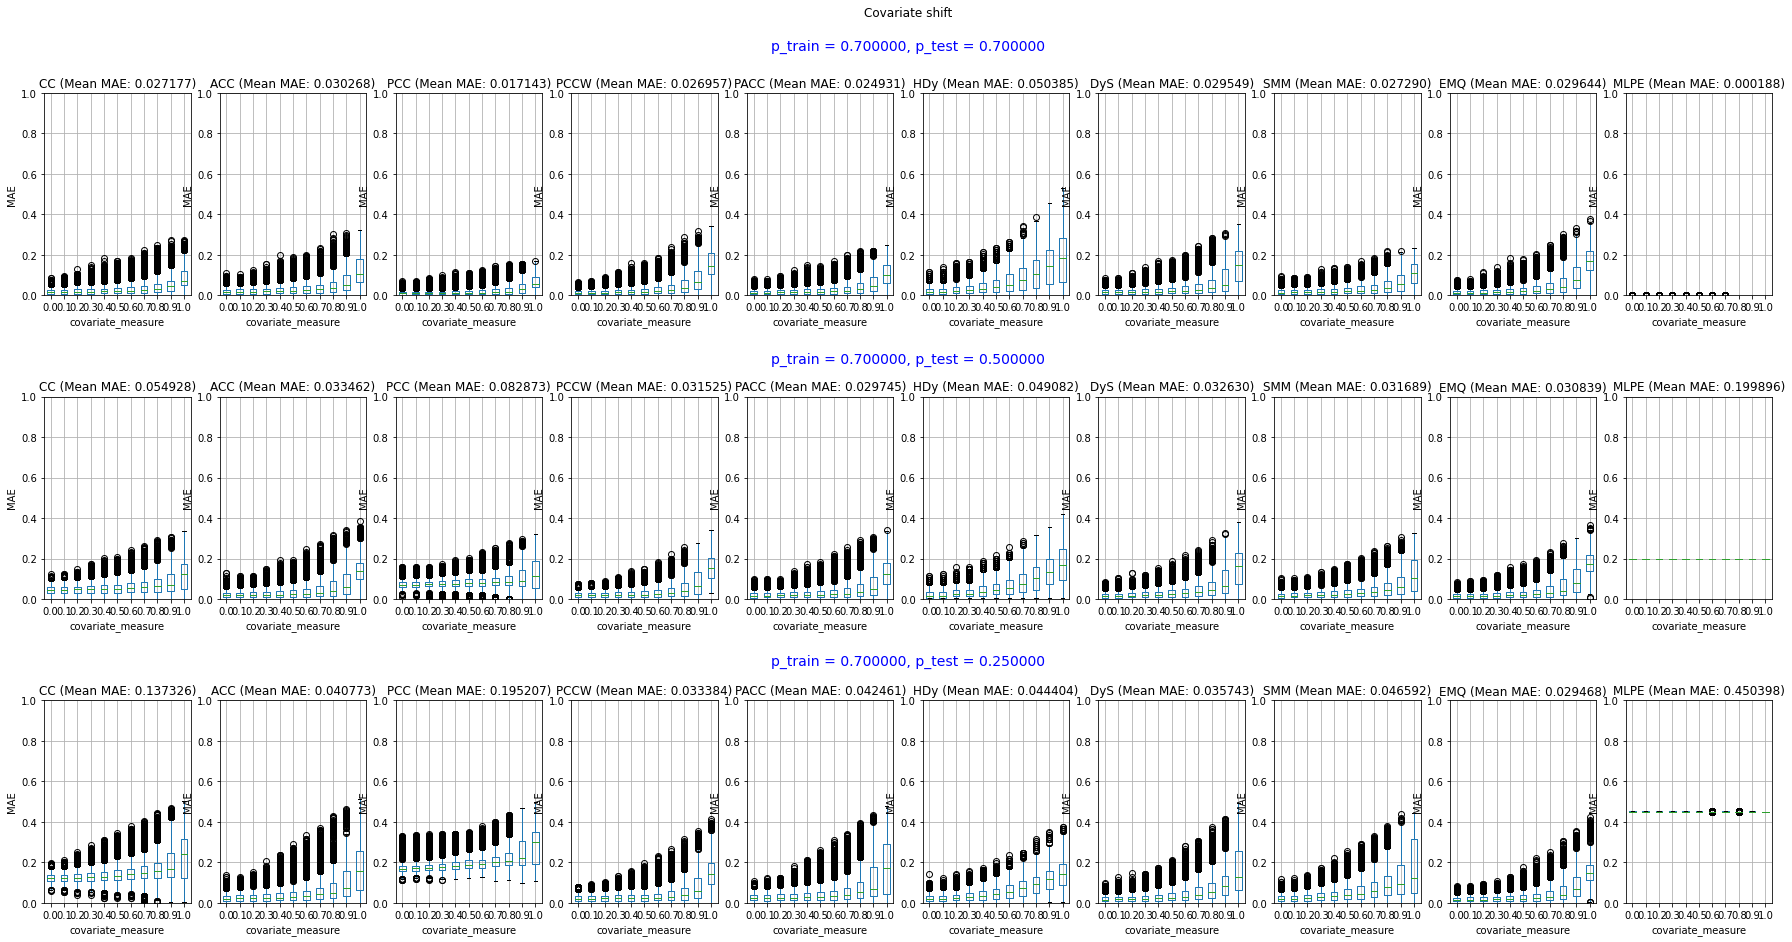

In [11]:
fig, ax = plt.subplots(len(ps_test),len(quantificators),figsize=(30,15))
plt.subplots_adjust(hspace=0.5)
for i, p_test in enumerate(ps_test):
    for k,quant_name in enumerate(quantificators):
        exp_id = "%s_%f" % (quant_name,p_test)
        results = results_dict[quant_name]
        results = results.loc[results['p_test'] == p_test]
        ax[i][k].set_ylim(0, 1)
        ax[i][k].set_ylabel(error)
        results.boxplot(ax=ax[i][k],column='error',by='covariate_measure')
        plt.suptitle('Covariate shift')
        ax[i][k].set_title("%s (Mean %s: %f)"  % (quant_name,error,mean_error_methods[exp_id]))

#Done by hand but I did not find an easy way
plt.figtext(0.5,0.95, "p_train = %f, p_test = %f" % (p_train,ps_test[0]), ha="center", va="top", fontsize=14, color="b")
plt.figtext(0.5,0.66, "p_train = %f, p_test = %f" % (p_train,ps_test[1]), ha="center", va="top", fontsize=14, color="b")
plt.figtext(0.5,0.38, "p_train = %f, p_test = %f" % (p_train,ps_test[2]), ha="center", va="top", fontsize=14, color="b")

### Tables and charts to be included in a paper

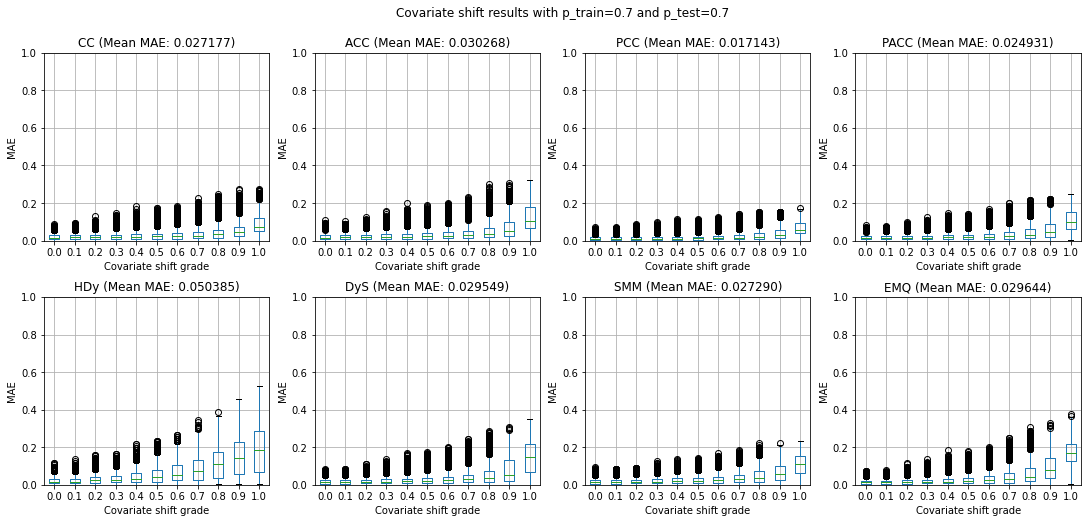

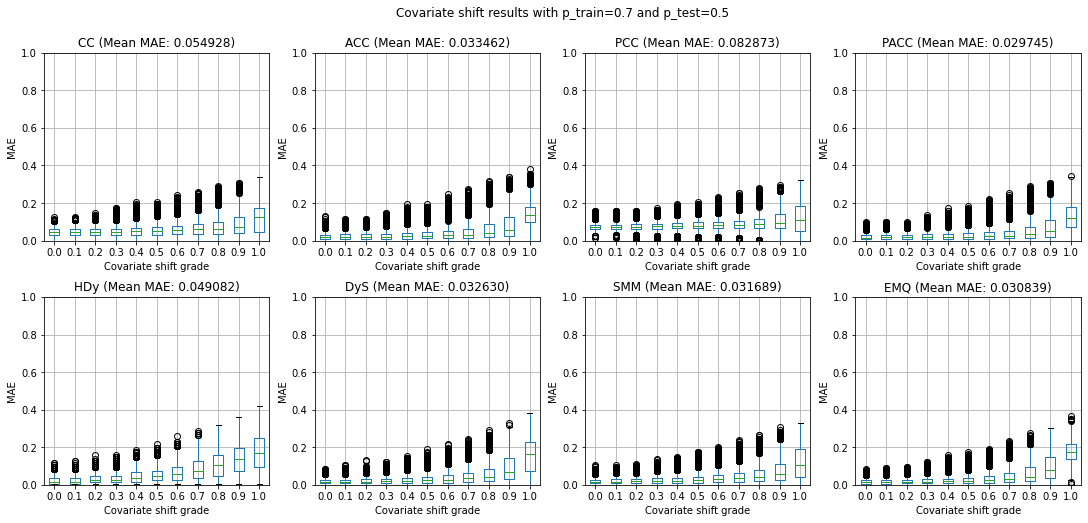

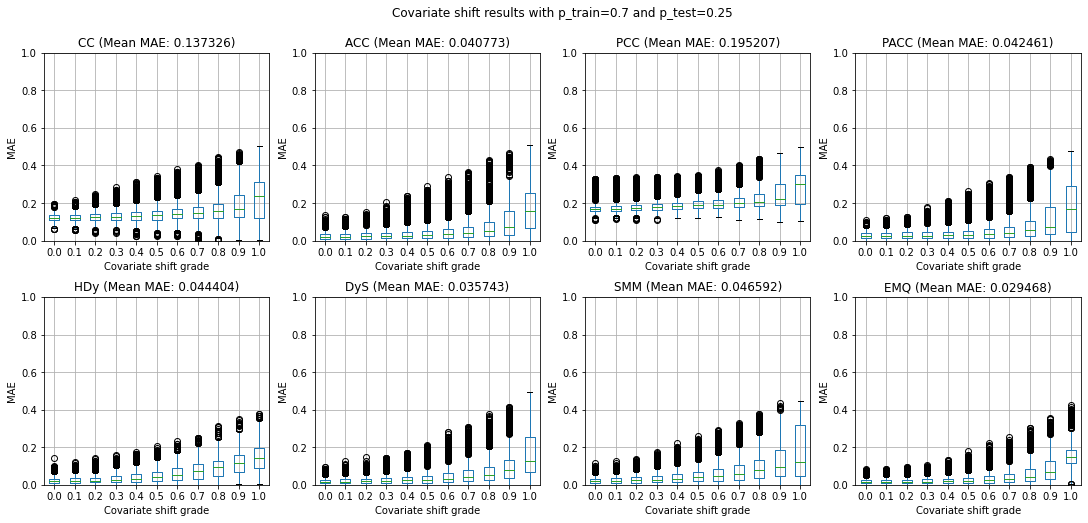

In [19]:
quantificators = ["CC", "ACC", "PCC", "PACC", "HDy", "DyS", "SMM", "EMQ"]
n_cols=4
for p_test in ps_test:
    fig, ax = plt.subplots(2,n_cols,figsize=(18,8))
    plt.subplots_adjust(hspace=0.3)
    for k,quant_name in enumerate(quantificators):
        exp_id = "%s_%f" % (quant_name,p_test)
        results = results_dict[quant_name]
        results = results.loc[results['p_test'] == p_test]
        ax[k//n_cols][k%n_cols].set_ylim(0, 1)
        ax[k//n_cols][k%n_cols].set_ylabel(error)
        results.boxplot(ax=ax[k//n_cols][k%n_cols],column='error',by='covariate_measure')
        ax[k//n_cols][k%n_cols].set_xlabel("Covariate shift grade")
        plt.suptitle('Covariate shift results with p_train=0.7 and p_test={}'.format(p_test))
        ax[k//n_cols][k%n_cols].set_title("%s (Mean %s: %f)"  % (quant_name,error,mean_error_methods[exp_id]))
    plt.savefig("images/covariate{}.pdf".format(p_test),format='pdf')
    plt.savefig("images/covariate{}.png".format(p_test),format='png')


## Shorter version of charts

Put a chart only with PCC and EMQ which are a representation of methods for covariate

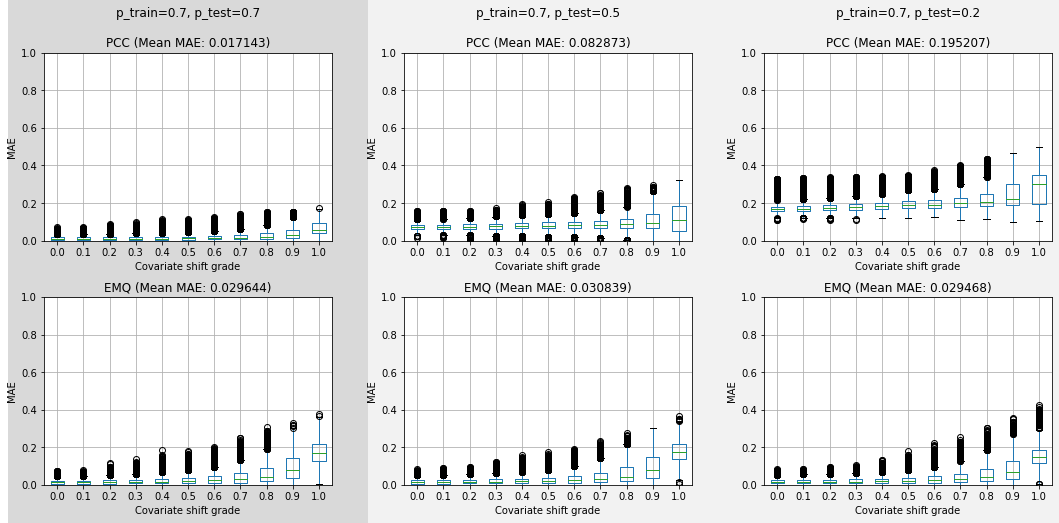

In [13]:
quantificators = ["PCC","EMQ"]
fig = plt.figure(figsize=(15,8))
subfigs = fig.subfigures(ncols=3,wspace=2)
plt.subplots_adjust(hspace=0.3)
for j, p_test in enumerate(ps_test):
    axs = subfigs[j].subplots(nrows=2)
    for k,quant_name in enumerate(quantificators):
        exp_id = "%s_%f" % (quant_name,p_test)
        results = results_dict[quant_name]
        results = results.loc[results['p_test'] == p_test]
        axs[k].set_ylim(0, 1)
        axs[k].set_ylabel(error)
        results.boxplot(ax=axs[k],column='error',by='covariate_measure')
        axs[k].set_xlabel("Covariate shift grade")
        axs[k].set_title("%s (Mean %s: %f)"  % (quant_name,error,mean_error_methods[exp_id]))
    subfigs[j].suptitle('p_train=0.7, p_test=%.1f' % p_test)

subfigs[0].set_facecolor('0.85')
subfigs[1].set_facecolor('0.95')
subfigs[2].set_facecolor('0.95')

plt.savefig("images/covariatesummary.pdf".format(p_test),format='pdf')
plt.savefig("images/covariatesummary.png".format(p_test),format='png')

## Main table for covariate shift in the paper

This table has the results for covariate shift. It is meant to be in the main paper.

In [14]:
from utils.wilcoxon import wilcoxon_test

quantificators = ["CC", "ACC", "PCC", "PACC", "HDy","DyS","SMM", "EMQ"]
columns = pd.MultiIndex.from_product([["p_test={}".format(p_test) for p_test in ps_test],quantificators])
global_results = pd.DataFrame(columns = columns,index=np.linspace(0,1,11).round(1))
for i, p_test in enumerate(ps_test):
    for k,quant_name in enumerate(quantificators):
        results = results_dict[quant_name]
        results = results.loc[results['p_test'] == p_test]
        results = results.groupby(by='covariate_measure')['error'].mean()
        global_results.loc[:, (["p_test={}".format(p_test)], [quant_name])] = results

global_results_style = global_results.style.format('{:.3f}').format_index('{:.1f}')

for i, p_test in enumerate(ps_test):
    #We want to make a statistical test for each row, to compare methods for the same degree of covariate shift
    for i,r in global_results.loc[:, (["p_test={}".format(p_test)])].iterrows():
        #compute the best method for this experiment
        covariate_measure = r.name
        best = r.index[r.argmin()]
        p_test = float(best[0][7:])
        best_method = best[1]
        #print("Computing statistical test for experiment covariate degree=%f, p_test=%s. Winner method %s" % (covariate_measure,p_test,best_method))
        #Get data for the winner method
        results_best = results_dict[best_method].loc[(results_dict[best_method]['p_test']==p_test) & (results_dict[best_method]['covariate_measure']==covariate_measure),'error'].to_numpy()
        #We need to get all the rows in results that matches this experiment for each method
        for quant_name in quantificators:
            if quant_name!=best_method:
                #print("Comparing %s with %s" % (best_method,quant_name))
                results_method = results_dict[quant_name].loc[(results_dict[quant_name]['p_test']==p_test) & (results_dict[quant_name]['covariate_measure']==covariate_measure),'error'].to_numpy()
                global_results_style.set_properties(subset=(covariate_measure, (best[0],quant_name)),**wilcoxon_test(results_best,results_method))
            


global_results_style = global_results_style.highlight_min(
    axis=1,props='textbf:--rwrap;',subset=(["p_test={}".format(ps_test[0])])).highlight_min(
    axis=1,props='textbf:--rwrap;',subset=(["p_test={}".format(ps_test[1])])).highlight_min(
    axis=1,props='textbf:--rwrap;',subset=(["p_test={}".format(ps_test[2])]))
display(global_results_style)
columns = 'r'*len(quantificators)
print(global_results_style.to_latex(hrules=True,multicol_align='c',column_format='l|'+columns+'|'+columns+'|'+columns).replace(' 0.',' .').replace('{0.','{.'))


\begin{tabular}{l|rrrrrrrr|rrrrrrrr|rrrrrrrr}
\toprule
 & \multicolumn{8}{c}{p_test=0.7} & \multicolumn{8}{c}{p_test=0.5} & \multicolumn{8}{c}{p_test=0.25} \\
 & CC & ACC & PCC & PACC & HDy & DyS & SMM & EMQ & CC & ACC & PCC & PACC & HDy & DyS & SMM & EMQ & CC & ACC & PCC & PACC & HDy & DyS & SMM & EMQ \\
\midrule
0.0 & .019 & .020 & \textbf{.012} & .016 & .022 & .017 & .017 & .015 & .047 & .022 & .075 & .020 & .023 & .019 & .019 & \textbf{.017} & .122 & .025 & .178 & .027 & .022 & \dag{.019} & .023 & \textbf{.018} \\
0.1 & .020 & .020 & \textbf{.012} & .017 & .024 & .018 & .018 & .016 & .047 & .023 & .076 & .020 & .024 & .019 & .020 & \textbf{.017} & .124 & .026 & .180 & .028 & .024 & .020 & .024 & \textbf{.018} \\
0.2 & .021 & .022 & \textbf{.013} & .018 & .028 & .019 & .019 & .018 & .048 & .024 & .078 & .022 & .029 & .021 & .022 & \textbf{.019} & .126 & .028 & .183 & .030 & .028 & .022 & .028 & \textbf{.019} \\
0.3 & .022 & .024 & \textbf{.014} & .019 & .035 & .021 & .021 & .020 & .

## PCCW results

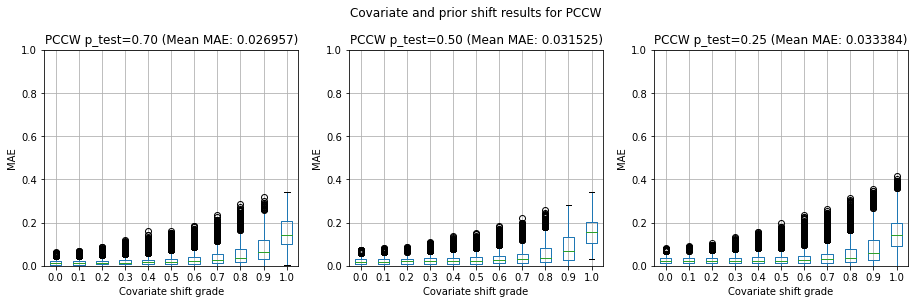

In [15]:
fig, ax = plt.subplots(1,3,figsize=(15,4))
for i, p_test in enumerate(ps_test): 
    quant_name="PCCW"
    exp_id = "%s_%f" % (quant_name,p_test)
    results = pd.read_csv("results/covariate/results_%s_%s.csv" % (dateexperiment,quant_name),index_col=0)
    results = results.loc[results['p_test'] == p_test]
    results['covariate_measure'] = abs(results['domainA_prop_train']-results['domainA_prop_test'])
    results['covariate_measure'] = results['covariate_measure'].round(1)
    ax[i].set_ylim(0, 1)
    ax[i].set_ylabel(error)
    results.boxplot(ax=ax[i],column='error',by='covariate_measure')
    ax[i].set_xlabel("Covariate shift grade")
    ax[i].set_title("%s p_test=%.2f (Mean %s: %f)"  % (quant_name,p_test,error,mean_error_methods[exp_id]))
plt.suptitle('Covariate and prior shift results for PCCW'.format(p_test),y=1.05)
plt.savefig("images/covariate_pccw.pdf",format='pdf')
plt.savefig("images/covariate_pccw.png",format='png')

## Tables to latex

All the tables for the suplemental material.

In [16]:
quantificators = ["CC", "ACC", "PCC", "PACC", "HDy","DyS","SMM", "EMQ"]
mean_error_methods = {}
for i, p_test in enumerate(ps_test):
    for quant_name in quantificators:
        exp_id = "%s_%f" % (quant_name,p_test)
        results = pd.read_csv("results/covariate/results_%s_%s.csv" % (dateexperiment,quant_name),index_col=0)
        results = results.loc[results['p_test'] == p_test]
        results_mean = results.groupby(['domainA_prop_train', 'domainA_prop_test'])['error'].mean().reset_index()
        #convert to matrix form
        results_mean = results_mean.pivot(index='domainA_prop_train', columns='domainA_prop_test', values='error')
        results_mean.columns.name=None
        results_mean.index.name=None
        results_mean.columns = results_mean.columns.map(lambda x: "%.1f" % float(x))
        mean_error_methods[exp_id]=results_mean.mean().mean()
        cm = sns.light_palette('red', as_cmap=True)
        f = open("tables/covariate/results_%s_%s.tex" % (quant_name,p_test), "w")
        label_name = "tab:covariate%s%.1f" % (quant_name,p_test)
        label_name = label_name.replace(".","")
        f.write(results_mean.style.format_index('{:.1f}').format('{:.3f}').background_gradient(cmap=cm,low=0,high=1).to_latex(convert_css=True,
                                caption="Results for \emph{covariate shift} for method %s. In rows, \emph{covariate shift} grade for training set, in columns, \emph{covariate shift} grade for test sample. p_test: %f. Mean %s: %f." % (quant_name,p_test,error,mean_error_methods[exp_id]),
                                column_format='lccccccccccc', position='H',label=label_name))
        f.close()